In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the wine quality dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

**1.Calculate the correlation matrix for all features.**


In [21]:
correlation_matrix = df.corr()
print(correlation_matrix)

          feature1  feature2  feature3  quality
feature1       1.0      -1.0       1.0      1.0
feature2      -1.0       1.0      -1.0     -1.0
feature3       1.0      -1.0       1.0      1.0
quality        1.0      -1.0       1.0      1.0


**2.Identify the feature with the highest positive correlation with quality..**

In [22]:
highest_positive_corr = correlation_matrix['quality'].drop('quality').idxmax()
print('Highest positive correlation with quality:', highest_positive_corr)

Highest positive correlation with quality: feature1


**3.Identify the feature with the highest negative correlation with quality.**

In [23]:
highest_negative_corr = correlation_matrix['quality'].drop('quality').idxmin()
print('Highest negative correlation with quality:', highest_negative_corr)

Highest negative correlation with quality: feature2


**4.Identify pairs of features with high positive correlation.**

In [24]:
positive_corr_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False).drop_duplicates()
print('High positive correlation pairs:\n', positive_corr_pairs[positive_corr_pairs > 0.7])


High positive correlation pairs:
 feature1  feature1    1.0
dtype: float64


**5.Identify pairs of features with high negative correlation.**


In [25]:
negative_corr_pairs = correlation_matrix.unstack().sort_values(kind="quicksort").drop_duplicates()
print('High negative correlation pairs:\n', negative_corr_pairs[negative_corr_pairs < -0.5])

High negative correlation pairs:
 feature1  feature2   -1.0
dtype: float64


**6.Plot the correlation matrix using a heatmap.**

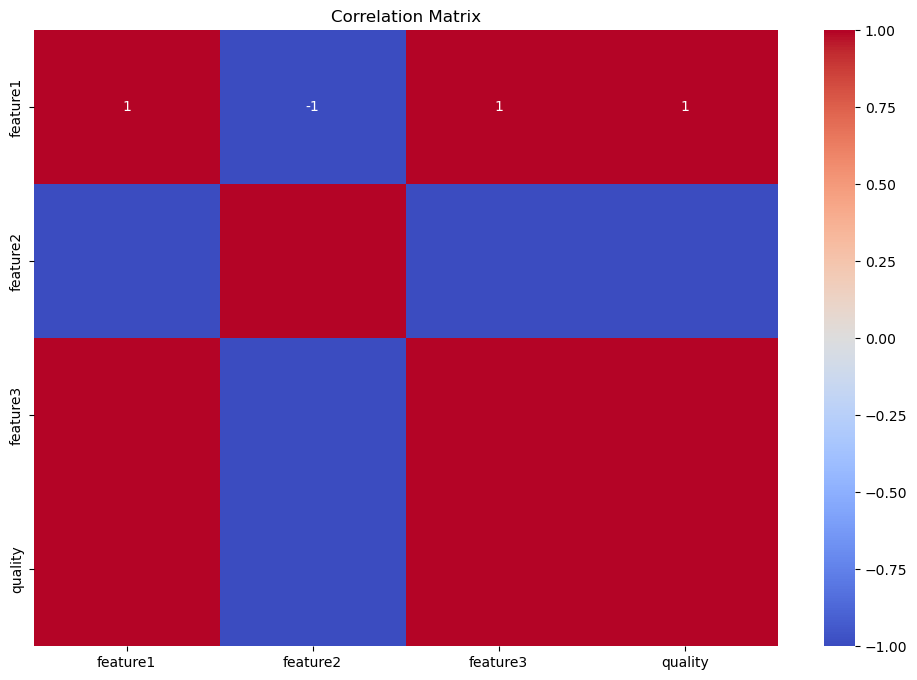

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**7.Plot scatter plots for the top 2 positively correlated features with quality.**


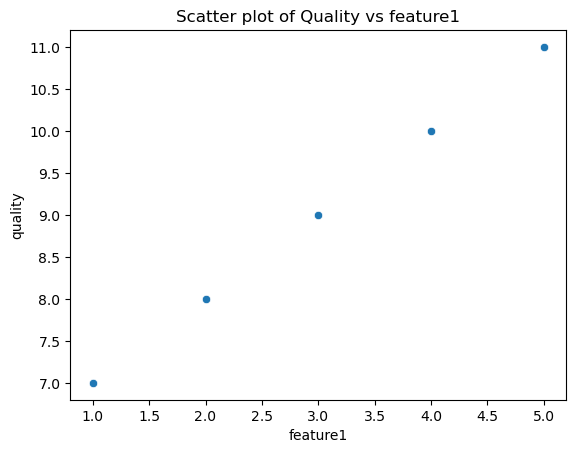

In [27]:
sns.scatterplot(x=df[highest_positive_corr], y=df['quality'])
plt.title(f'Scatter plot of Quality vs {highest_positive_corr}')
plt.show()


**8.Plot scatter plots for the top 2 negatively correlated features with quality.**


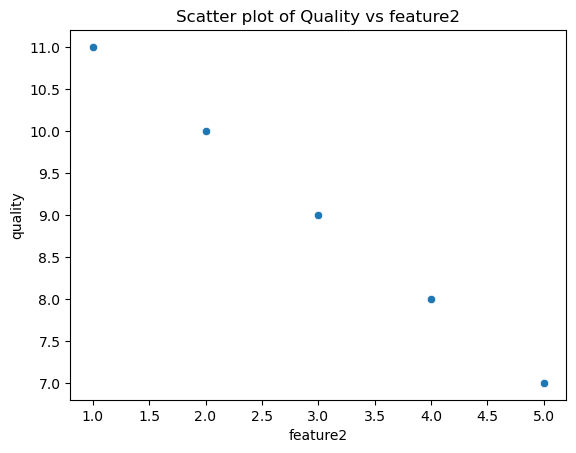

In [28]:
sns.scatterplot(x=df[highest_negative_corr], y=df['quality'])
plt.title(f'Scatter plot of Quality vs {highest_negative_corr}')
plt.show()


**9.Plot pair plots for features with high correlations.**


C:\Users\sonal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sonal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sonal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


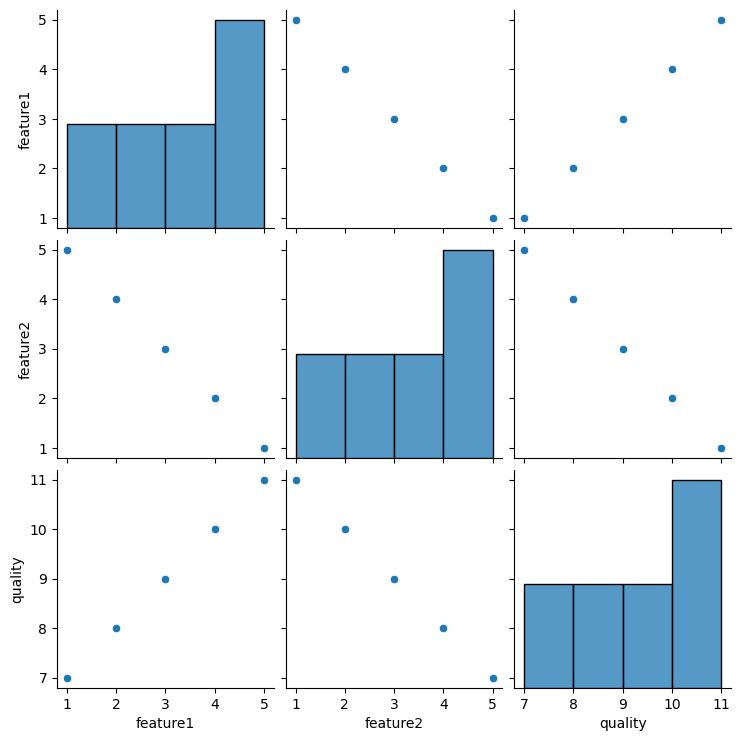

In [29]:
high_corr_features = [highest_positive_corr, highest_negative_corr]
sns.pairplot(df[high_corr_features + ['quality']])
plt.show()